## Circulation climatology East Asia

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from thesis_toolbox.plot.plot_climatology import plot_climatology_500hpa
from thesis_toolbox.plot.tools import map_large_scale, add_letter
from thesis_toolbox.process_era5 import resample_seasonal
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [ ]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    oro=snakemake.input.oro
else:
    path = '../../'
    to_file= False
    oro = '../../downloads/ERA5_orography.nc'

### Read data

In [2]:
def plot_absolute_geopotiential(ds, ax=None):
    if ax == None:
        ax = plt.gca()
    map_large_scale(ax)
    CS = ds.Z.plot.contour(transform=ccrs.PlateCarree(), ax=ax,colors='black', linewidths=.7, levels=np.arange(510,592,4), add_labels=False, alpha=1)
    CS.collenctions[2].set_linewidth(3)

In [4]:
def create_climatology(path, sdate,edate):
    ds = xr.open_dataset(path)
    ds = ds.sel(longitude=slice(20,180),latitude=slice(90,0))
    ds = ds.sel(time=slice(sdate,edate)).mean(dim='time',keep_attrs=True)
    return ds

In [5]:
def calculate_windspeed(u,v,sdate,edate):
    u = u.sel(time=slice(sdate,edate))
    v = v.sel(time=slice(sdate,edate))
    ws = np.sqrt(u.u**2+v.v**2)
    ws = ws.mean(dim='time')
    return ws

In [6]:
data_path = path+'downloads/intermediate_results/'

orography = xr.open_dataset(path+'downloads/ERA5_orography.nc').isel(time=0)
geopotential_500_DJF = create_climatology(data_path+'era5.500hPa.GeopotHeight.DJF.1979-2019.nc', '1999','2019')
geopotential_500_MAM = create_climatology(data_path+'era5.500hPa.GeopotHeight.MAM.1979-2019.nc', '1999','2019')
mslp_DJF = create_climatology(data_path+'era5.single_level.mean_sea_level_pressure.DJF.1979-2019.nc','1999','2019')/100
mslp_MAM = create_climatology(data_path+'era5.single_level.mean_sea_level_pressure.MAM.1979-2019.nc', '1999','2019')/100
geopotential_200_DJF = create_climatology(data_path+'era5.200hPa.GeopotHeight.DJF.1979-2019.nc', '1999','2019')
geopotential_200_MAM = create_climatology(data_path+'era5.200hPa.GeopotHeight.MAM.1979-2019.nc', '1999','2019')

wind_500_hpa_u_DJF = create_climatology(data_path+'era5.500hPa.u_component_of_wind.DJF.1979-2019.nc', '1999','2019')
wind_500_hpa_v_DJF = create_climatology(data_path+'era5.500hPa.v_component_of_wind.DJF.1979-2019.nc', '1999','2019')
wind_500_hpa_u_MAM = create_climatology(data_path+'era5.500hPa.u_component_of_wind.MAM.1979-2019.nc', '1999','2019')
wind_500_hpa_v_MAM = create_climatology(data_path+'era5.500hPa.v_component_of_wind.MAM.1979-2019.nc', '1999','2019')

wind_850_hpa_u_DJF = create_climatology(data_path+'era5.850hPa.u_component_of_wind.DJF.1979-2019.nc', '1999','2019')
wind_850_hpa_v_DJF = create_climatology(data_path+'era5.850hPa.v_component_of_wind.DJF.1979-2019.nc', '1999','2019')
wind_850_hpa_u_MAM = create_climatology(data_path+'era5.850hPa.u_component_of_wind.MAM.1979-2019.nc', '1999','2019')
wind_850_hpa_v_MAM = create_climatology(data_path+'era5.850hPa.v_component_of_wind.MAM.1979-2019.nc', '1999','2019')


ws_200hPa_DJF = calculate_windspeed(xr.open_dataset(data_path+'era5.200hPa.u_component_of_wind.DJF.1979-2019.nc'),
                                   xr.open_dataset(data_path+'era5.200hPa.v_component_of_wind.DJF.1979-2019.nc'),'1999','2019') 
ws_200hPa_MAM = calculate_windspeed(xr.open_dataset(data_path+'era5.200hPa.u_component_of_wind.MAM.1979-2019.nc'),
                                   xr.open_dataset(data_path+'era5.200hPa.v_component_of_wind.MAM.1979-2019.nc'),'1999','2019')

ws_500hPa_DJF = calculate_windspeed(xr.open_dataset(data_path+'era5.500hPa.u_component_of_wind.DJF.1979-2019.nc'),
                                   xr.open_dataset(data_path+'era5.500hPa.v_component_of_wind.DJF.1979-2019.nc'),'1999','2019') 
ws_500hPa_MAM = calculate_windspeed(xr.open_dataset(data_path+'era5.500hPa.u_component_of_wind.MAM.1979-2019.nc'),
                                   xr.open_dataset(data_path+'era5.500hPa.v_component_of_wind.MAM.1979-2019.nc'),'1999','2019') 

In [6]:
def add_colorbar(im,cticks,label='', fmt='%d'):

    ax = im.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3.5%", pad=0.05, axes_class=mpl.pyplot.Axes)

    fig.colorbar(im,ax=ax,cax=cax,label=label,shrink=0.9, format=fmt, ticks=cticks)

In [19]:
def plot_windvectors(u,v,ax=None, vector_lenght=8, **quiver_kwargs):
    if ax ==None:
        ax=plt.gca()
    Q = ax.quiver(u.longitude[::22], v.latitude[::22], u.u[::22,::22], v.v[::22,::22],transform=ccrs.PlateCarree(),color='saddlebrown', 
          units='xy', zorder=1002, minlength=2, pivot='middle',angles='uv',**quiver_kwargs)
    qk=ax.quiverkey(Q, 0.8,0.91, U=vector_lenght, label='{} m/s'.format(vector_lenght), labelpos='E',color='black',coordinates='axes')
    qk.text.set_backgroundcolor('w')

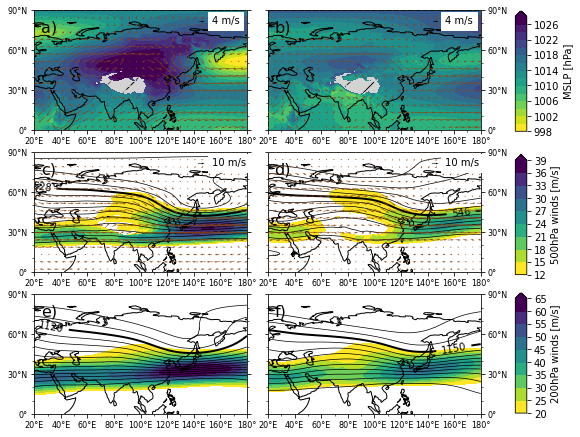

In [48]:
fig ,ax = plt.subplots(nrows=3, ncols=2, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(8,7.6))
add_letter(ax, y=0.82)
for ax_i in ax.ravel():
    map_large_scale(ax_i)
# DJF MSLP
im = mslp_DJF.msl.plot.contourf(transform=ccrs.PlateCarree(),levels=np.linspace(998, 1028, 16), cmap='viridis_r'
                                                        , extend='max', ax =ax[0,0], add_colorbar=False)
orography.z.where(orography.z > 33000,drop=True).plot.contourf(transform=ccrs.PlateCarree(), levels=2, colors='lightgrey'
                                                            , add_colorbar=False,ax =ax[0,0], zorder=1100, hatches='/')  
# # add_colorbar(im,im.levels,label='Mean Sea Level Pressure [hPa]',fmt='%d',)
# 850 wind DJF
plot_windvectors(wind_850_hpa_u_DJF,wind_850_hpa_v_DJF,ax[0,0],4, scale=1)

# MAM MSLP
im = mslp_MAM.msl.plot.contourf(transform=ccrs.PlateCarree(),levels=np.linspace(998, 1028, 16), cmap='viridis_r'
                                                        , extend='neither', ax =ax[0,1], add_colorbar=False)
orography.z.where(orography.z > 33000,drop=True).plot.contourf(transform=ccrs.PlateCarree(), levels=2, colors='lightgrey'
                                                            , add_colorbar=False,ax =ax[0,1], zorder=1100, hatches='/')  
# add_colorbar(im,im.levels,label='Mean Sea Level Pressure [hPa]',fmt='%d')
plot_windvectors(wind_850_hpa_u_MAM,wind_850_hpa_v_MAM,ax[0,1],4, scale=1)

ax[0,1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
ax[0,0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
ax[0,0].tick_params(axis="both", labelsize=8)
ax[0,1].tick_params(axis="both", labelsize=8)

# # DJF Geopot 500hPA

CS = geopotential_500_DJF.Z.plot.contour(transform=ccrs.PlateCarree(), ax=ax[1,0],colors='black', 
                                     linewidths=.7, levels=np.arange(510,592,6), add_labels=False, alpha=1)
CS.collections[3].set_linewidth(2)
ax[1,0].clabel(CS,[CS.levels[3]], inline=True, fmt='%d', fontsize=10)
plot_windvectors(wind_500_hpa_u_DJF,wind_500_hpa_v_DJF,ax[1,0],10, scale=2)
im = ws_500hPa_DJF.where(ws_500hPa_DJF > 12, drop=True).plot.contourf(transform=ccrs.PlateCarree(), levels=np.arange(12,40,3), 
                                                            cmap='viridis_r', extend='neither', add_colorbar=False,ax =ax[1,0])
# add_colorbar(im,im.levels,label='Wind Speed 500hPa [m/s]')
# MAM Geopot 500hPa

CS = geopotential_500_MAM.Z.plot.contour(transform=ccrs.PlateCarree(), ax=ax[1,1],colors='black', 
                                     linewidths=.7, levels=np.arange(510,592,6), add_labels=False, alpha=1)
CS.collections[6].set_linewidth(2)
ax[1,1].clabel(CS,[CS.levels[6]], inline=True, fmt='%d', fontsize=10)
plot_windvectors(wind_500_hpa_u_MAM,wind_500_hpa_v_MAM,ax[1,1],10, scale=2)
im = ws_500hPa_MAM.where(ws_500hPa_MAM > 12, drop=True).plot.contourf(transform=ccrs.PlateCarree(), levels=np.arange(12,40,3), 
                                                            cmap='viridis_r', extend='neither', add_colorbar=False,ax =ax[1,1])
ax[1,1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
ax[1,0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
ax[1,0].tick_params(axis="both", labelsize=8)
ax[1,1].tick_params(axis="both", labelsize=8)


# add_colorbar(im,im.levels,label='Wind Speed 500hPa [m/s]')
#DJF Geopot 200hPA
CS = geopotential_200_DJF.Z.plot.contour(transform=ccrs.PlateCarree(), ax=ax[2,0],colors='black', 
                                     linewidths=.7,  levels=np.arange(1100,1240, 10) ,add_labels=False, alpha=1)
CS.collections[2].set_linewidth(2)
ax[2,0].clabel(CS,[CS.levels[2]], inline=True, fmt='%d', fontsize=10)
im = ws_200hPa_DJF.where(ws_200hPa_DJF >= 20, drop=True).plot.contourf(transform=ccrs.PlateCarree(), levels=np.arange(20,70,5),
                                                        cmap='viridis_r', extend='max', add_colorbar=False,ax =ax[2,0])
# add_colorbar(im,im.levels,label='Wind Speed 200hPa [m/s]')
# MAM Geopot 200hPa

CS = geopotential_200_MAM.Z.plot.contour(transform=ccrs.PlateCarree(), ax=ax[2,1],colors='black', 
                                     linewidths=.7,  levels=np.arange(1130,1250, 10) ,add_labels=False, alpha=1)
CS.collections[2].set_linewidth(2)
ax[2,1].clabel(CS,[CS.levels[2]], inline=True, fmt='%d', fontsize=10)
im = ws_200hPa_MAM.where(ws_200hPa_MAM >= 20, drop=True).plot.contourf(transform=ccrs.PlateCarree(), levels=np.arange(20,70,5),
                                                        cmap='viridis_r', extend='max', add_colorbar=False,ax =ax[2,1])
# add_colorbar(im,im.levels,label='Wind Speed 200hPa [m/s]')
ax[2,1].tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
ax[2,0].tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
ax[2,0].tick_params(axis="both", labelsize=8)
ax[2,1].tick_params(axis="both", labelsize=8)

plt.subplots_adjust(hspace=0.1, wspace=0.1)
for ax_i in ax.ravel():
    ax_i.set_ylabel('')
    ax_i.set_xlabel('')

ax[0,0].set_title('')
ax[0,1].set_title('')
cax = fig.add_axes([0.96,0.65,0.02,0.22])
cax_1 = fig.add_axes([0.96,0.388,0.02,0.22])
cax_2 = fig.add_axes([0.96,0.135,0.02,0.22])

cmap = mpl.cm.viridis_r
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.linspace(998, 1028, 16),cmap.N),cmap),cax=cax, extend='max', label='MSLP [hPa]')
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(12,40,3),cmap.N),cmap),cax=cax_1, extend='max', label='500hPa winds [m/s]')
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(20,70,5),cmap.N),cmap),cax=cax_2, extend='max', label='200hPa winds [m/s]')
if to_file:
    plt.savefig(snakemake.output.outpath,bbox_inches='tight')